MG Systemに対して、Noiseがある/ない場合のlong-term predictionを比べる。

In [ ]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import reservoirpy as rpy

# just a little tweak to center the plots, nothing to worry about
from IPython.core.display import HTML
HTML("""
<style>
.img-center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

rpy.set_seed(42)

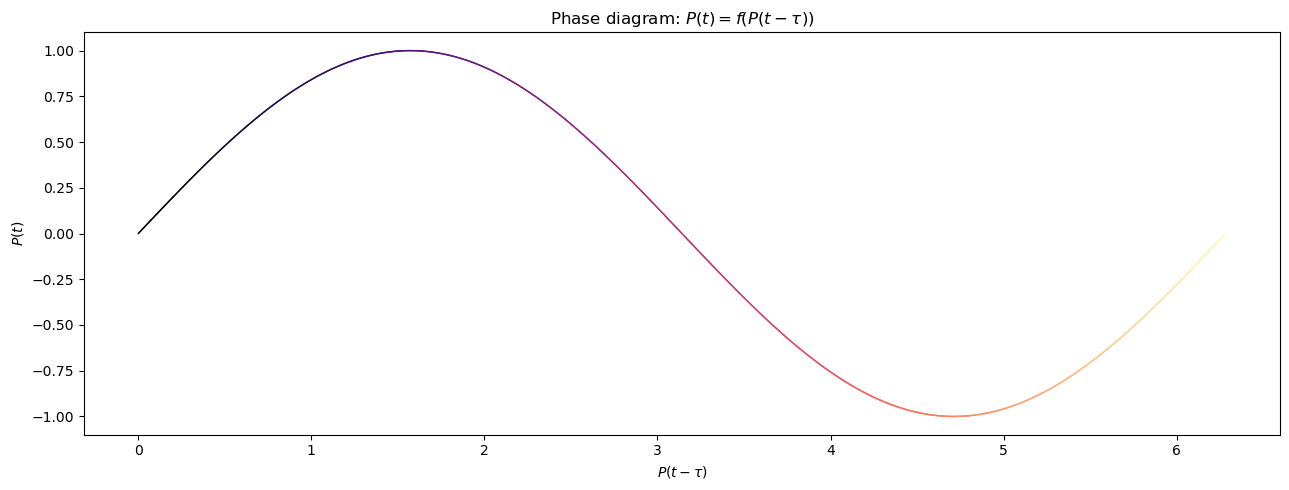

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [1]:
#ChatGPT作。

def count_transitions(X, Y_pred, grid_size=0.05):
    # Create grid
    x_bins = np.arange(X.min(), X.max() + grid_size, grid_size)
    y_bins = np.arange(Y_pred.min(), Y_pred.max() + grid_size, grid_size)

    # Label each point with its grid cell
    x_indices = np.digitize(X, x_bins) - 1
    y_indices = np.digitize(Y_pred, y_bins) - 1

    # Create transition matrix
    transition_counts = np.zeros((len(x_bins)-1, len(y_bins)-1))

    # Count transitions
    for i in range(1, len(X)):
        if x_indices[i] != x_indices[i-1] or y_indices[i] != y_indices[i-1]:
            transition_counts[x_indices[i-1], y_indices[i-1]] += 1

    return transition_counts

def plot_mackey_glass2(X, Y_pred, sample, tau):
    N = sample

    plt.figure(figsize=(13, 5))
    ax2 = plt.subplot(1, 1, 1)
    ax2.margins(0.05)
    for i in range(N-1):
        ax2.plot(X[i:i+2], Y_pred[i:i+2], color=plt.cm.magma(255*i//N), lw=1.0)

    plt.title(f"Phase diagram: $P(t) = f(P(t-\\tau))$")
    plt.xlabel("$P(t-\\tau)$")
    plt.ylabel("$P(t)$")

    plt.tight_layout()
    plt.show()

    # Count transitions and return
    transitions = count_transitions(X, Y_pred)
    return transitions

# Test the function
X = np.linspace(0, 2*np.pi, 1000)
Y_pred = np.sin(X)
transitions = plot_mackey_glass2(X, Y_pred, 1000, 1)
print(transitions)
